# Problem 3.7.5 Reduced Michaelis-Menten

In [1]:
using Plots
using DifferentialEquations
using ModelingToolkit
Plots.gr(lw=2)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)
reducedmm(x, k) = x / k

reducedmm (generic function with 1 method)

In [3]:
@parameters v_0 v_m1 v_m2 v_m3 Km_1 Km_2 Km_3
@variables t S1(t) S2(t) S3(t) v1(t) v2(t) v3(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
eqsFull = [ v1 ~ v_m1 * hill(S1, Km_1),
            v2 ~ v_m2 * hill(S2, Km_2),
            v3 ~ v_m3 * hill(S3, Km_3),
            D(S1) ~ v_0 - v1,
            D(S2) ~ v1 - v2,
            D(S3) ~ v2 - v3]

@named fullsys = ODESystem(eqsFull)
fullSys = structural_simplify(fullsys)

Model fullsys with 3 equations
States (3):
  S1(t)
  S2(t)
  S3(t)
Parameters (7):
  Km_1
  v_m1
  v_m2
  Km_2
  v_m3
  Km_3
⋮
Incidence matrix:
 ×  ⋅  ⋅  ×  ⋅  ⋅
 ⋅  ×  ⋅  ×  ×  ⋅
 ⋅  ⋅  ×  ⋅  ×  ×

In [5]:
eqsRe =   [ v1 ~ v_m1 * S1 / Km_1,
            v2 ~ v_m2 * S2 / Km_2,
            v3 ~ v_m3 * S3 / Km_3,
            D(S1) ~ v_0 - v1,
            D(S2) ~ v1 - v2,
            D(S3) ~ v2 - v3]
@named reSys = ODESystem(eqsRe)
reSys = structural_simplify(reSys)

Model reSys with 3 equations
States (3):
  S1(t)
  S2(t)
  S3(t)
Parameters (7):
  Km_1
  v_m1
  v_m2
  Km_2
  v_m3
  Km_3
⋮
Incidence matrix:
 ×  ⋅  ⋅  ×  ⋅  ⋅
 ⋅  ×  ⋅  ×  ×  ⋅
 ⋅  ⋅  ×  ⋅  ×  ×

In [6]:
u0 = [S1 => 0.3, S2 => 0.2, S3 => 0.1]
tend = 2.0
params = [v_0 => 2, v_m1 => 9, v_m2 => 12, v_m3 => 15, Km_1 => 1.0, Km_2 => 0.4, Km_3 => 3.0]

7-element Vector{Pair{Num, Float64}}:
  v_0 => 2.0
 v_m1 => 9.0
 v_m2 => 12.0
 v_m3 => 15.0
 Km_1 => 1.0
 Km_2 => 0.4
 Km_3 => 3.0

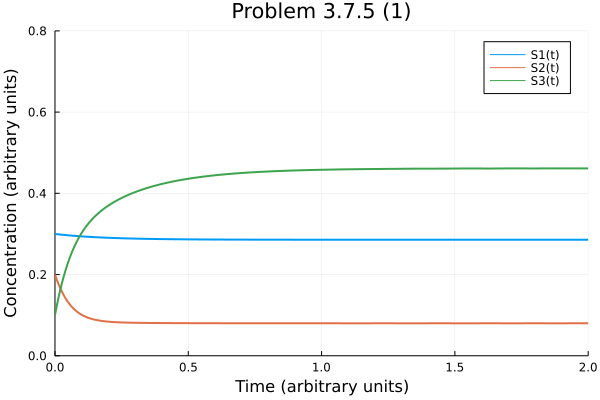

In [7]:
sol1 = solve(ODEProblem(fullSys, u0, tend, params))

plot(sol1, ylims=(0.0, 0.8),
     title="Problem 3.7.5 (1)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)")

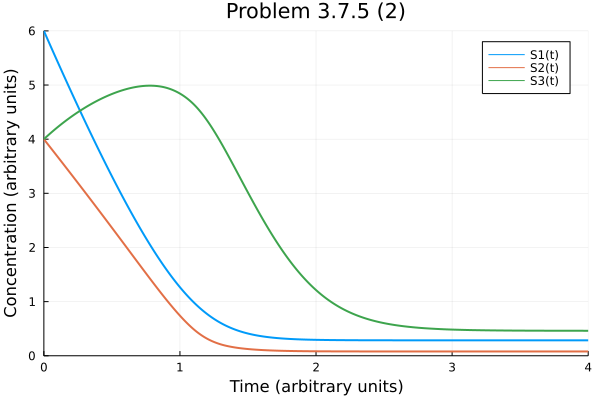

In [8]:
u1 = [S1=>6.0, S2=>4.0, S3=>4.0]
sol2 = solve(ODEProblem(fullSys, u1, 4.0, params))

plot(sol2, ylims=(0.0, 6.0),
     title="Problem 3.7.5 (2)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)")

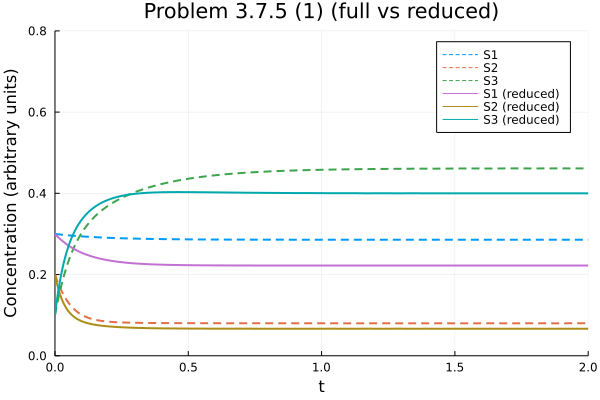

In [9]:
sol3 = solve(ODEProblem(reSys, u0, tend, params))

p3 = plot(sol1, ylims=(0.0, 0.8),
     title="Problem 3.7.5 (1) (full vs reduced)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)",
     labels=["S1 " "S2 " "S3 "], ls=:dash)
plot!(p3, sol3, labels=["S1 (reduced)" "S2 (reduced)" "S3 (reduced)"] )

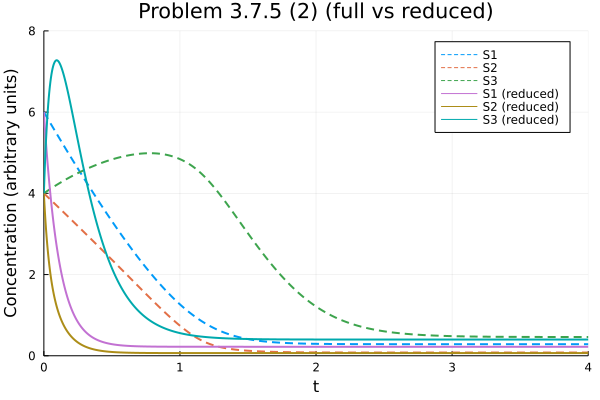

In [10]:
sol4 = solve(ODEProblem(reSys, u1, 4.0, params))
p4 = plot(sol2, ylims=(0.0, 8.0),
     title="Problem 3.7.5 (2) (full vs reduced)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)",
     labels=["S1 " "S2 " "S3 "], ls=:dash)
plot!(p4, sol4, labels=["S1 (reduced)" "S2 (reduced)" "S3 (reduced)"] )